<a href="https://colab.research.google.com/github/warrenjch/area-test/blob/main/areatest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 86.0 MB/s eta 0:00:00


In [8]:
#for n-sided polygon in 2d
import numpy as np
import pandas as pd
from numpy.linalg import norm
from shapely.geometry import Point, Polygon
import geopandas as gpd
#fast point generation in regular polygon using gpd source: https://www.matecdev.com/posts/random-points-in-polygon.html

def Random_Points_in_Bounds(polygon, number):
    minx, miny, maxx, maxy = polygon.bounds
    x = np.random.uniform(minx, maxx, number)
    y = np.random.uniform(miny, maxy, number)
    return x, y

In [9]:
def pdist(p, vs):
  dist_arr = [norm(np.array(np.subtract(v,p))) for v in vs]
  f,g = sorted(dist_arr)[0], sorted(dist_arr)[1]
  P1, P2 = a[dist_arr.index(f)], a[dist_arr.index(g)]
  d = norm(np.cross(np.subtract(p,P1),np.subtract(P1,P2))/norm(np.array(np.subtract(P1,P2))))
  return d

In [10]:
import math

n = 3 #limit is approx 150
a = [[(1/math.cos(math.pi/n))*(math.cos(math.pi*((1+2*i)/n))),(1/math.cos(math.pi/n))*(math.sin(math.pi*((1+2*i)/n)))] for i in range(n)]
polygon = Polygon(a)
k = 10000
x,y = Random_Points_in_Bounds(polygon, k)
p = list(zip(x,y))
df = pd.DataFrame()
df['points'] = p
gdf_poly = gpd.GeoDataFrame(index=["myPoly"], geometry=[polygon])
df['points'] = df['points'].apply(Point)
gdf_points = gpd.GeoDataFrame(df, geometry='points')
Sjoin = gpd.tools.sjoin(gdf_points, gdf_poly, predicate="within", how='left')

ptdf = gdf_points[Sjoin.index_right=='myPoly']
ptdf.reset_index(drop=True, inplace=True)
fp = [[ptdf['points'][i].x, ptdf['points'][i].y] for i in range(ptdf.shape[0])]
if len(fp)%2 == 1:
  fp = fp[:-1]
k = len(fp)

In [11]:
m = [[(fp[2*i][0]+fp[2*i+1][0])/2,(fp[2*i][1]+fp[2*i+1][1])/2] for i in range(int(k/2))]
f = [[fp[2*i], m[i], pdist(m[i],a)] for i in range(int(k/2))]
valid = [1 if (norm(np.array(np.subtract(i[0],i[1])))<i[2]) else 0 for i in f]
print(np.sum(valid)/len(valid))

0.40290088638195004


In [13]:
#theoretical answer
print(2*np.pi/(3*n*np.tan(np.pi/n)))

0.40306652538538185


[]

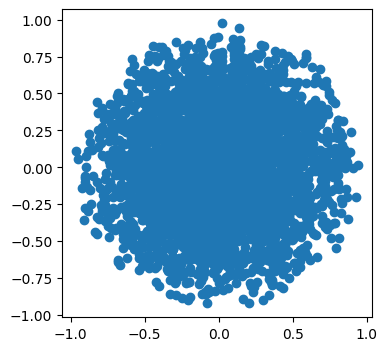

In [ ]:
# for checking
import matplotlib.pyplot as plt
xplot, yplot = np.array(m).T
plt.scatter(xplot,yplot)
plt.rcParams['figure.figsize'] = [4, 3]
plt.plot()

In [16]:
#for n-ball
import numpy as np
import pandas as pd
from numpy.linalg import norm
#method: https://extremelearning.com.au/how-to-generate-uniformly-random-points-on-n-spheres-and-n-balls/ Muller method 20

dim = 5
k = 100000
def gen_v(d):
  u1 = np.array(np.random.normal(0,1,d))
  v1 = np.random.uniform()**(1.0/d)*u1/norm(u1)
  u2 = np.array(np.random.normal(0,1,d))
  v2 = np.random.uniform()**(1.0/d)*u2/norm(u2)
  m = np.add(v1,v2)/2
  dist = norm(np.subtract(v1,m))
  r = norm(m)
  if dist>(1-r):
    return 0
  else:
    return 1
a = np.array([gen_v(dim) for i in range(k)])
print(np.sum(a)/k)

0.12735
